<a href="https://colab.research.google.com/github/abhi147p/Abhishek_INFO5731_Spring2023/blob/main/INFO5731_Assignment_Three_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [210]:
# Write your code here

import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/abhi147p/Abhishek_INFO5731_Spring2023/main/After%20cleaning%20data.csv")
df.head()

,Unnamed: 0,Text,text_modified
0,0,The entire movie looked like Video game art fr...,entire movie looked like video game art budoka...
1,1,"I'm not a Dragon Ball fan, the only times I've...",im dragon ball fan times ive watched back chil...
2,2,"I've seen the movie on cinema, and me laugh so...",ive seen movie cinema laugh much like humor mo...
3,3,"To be honest, at first I was really concerned ...",honest first really concerned cgianimation sin...
4,4,As A Dragon Ball Fan From India It Was Delight...,dragon ball fan india delight watch theatre ma...


In [211]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Text,text_modified
0,The entire movie looked like Video game art fr...,entire movie looked like video game art budoka...
1,"I'm not a Dragon Ball fan, the only times I've...",im dragon ball fan times ive watched back chil...
2,"I've seen the movie on cinema, and me laugh so...",ive seen movie cinema laugh much like humor mo...
3,"To be honest, at first I was really concerned ...",honest first really concerned cgianimation sin...
4,As A Dragon Ball Fan From India It Was Delight...,dragon ball fan india delight watch theatre ma...


In [212]:
from nltk.stem import PorterStemmer # stemming
st = PorterStemmer()
df['cleaned_txt'] = df['text_modified'].apply(lambda x: "".join([st.stem(word) for word in x]))
df.head()

,Text,text_modified,cleaned_txt
0,The entire movie looked like Video game art fr...,entire movie looked like video game art budoka...,entire movie looked like video game art budoka...
1,"I'm not a Dragon Ball fan, the only times I've...",im dragon ball fan times ive watched back chil...,im dragon ball fan times ive watched back chil...
2,"I've seen the movie on cinema, and me laugh so...",ive seen movie cinema laugh much like humor mo...,ive seen movie cinema laugh much like humor mo...
3,"To be honest, at first I was really concerned ...",honest first really concerned cgianimation sin...,honest first really concerned cgianimation sin...
4,As A Dragon Ball Fan From India It Was Delight...,dragon ball fan india delight watch theatre ma...,dragon ball fan india delight watch theatre ma...


In [213]:
from textblob import Word
import nltk
nltk.download('wordnet')
# Lemmatization
df['cleaned_txt'] = df['cleaned_txt'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Text,text_modified,cleaned_txt
0,The entire movie looked like Video game art fr...,entire movie looked like video game art budoka...,entire movie looked like video game art budoka...
1,"I'm not a Dragon Ball fan, the only times I've...",im dragon ball fan times ive watched back chil...,im dragon ball fan time ive watched back child...
2,"I've seen the movie on cinema, and me laugh so...",ive seen movie cinema laugh much like humor mo...,ive seen movie cinema laugh much like humor mo...
3,"To be honest, at first I was really concerned ...",honest first really concerned cgianimation sin...,honest first really concerned cgianimation sin...
4,As A Dragon Ball Fan From India It Was Delight...,dragon ball fan india delight watch theatre ma...,dragon ball fan india delight watch theatre ma...


In [214]:
df.to_csv("Assignment_3_data.csv")

In [215]:
# 1. N=3, Grams frequency
from textblob import TextBlob
def get_N_grams(df, N):
  return [TextBlob(df.loc[x, 'cleaned_txt']).ngrams(N) for x in range(len(df))]

def get_freq_grams(tot_data):
  count = {}
  for sub_data in tot_data:
    for data in sub_data:
      tup_dt = tuple(data)
      count[tup_dt] = count.get(tup_dt, 0) + 1
  return count

trigrams = get_N_grams(df, 3)

In [216]:
trig_freq = get_freq_grams(trigrams)

In [217]:
trig_freq

{('entire', 'movie', 'looked'): 7,
 ('movie', 'looked', 'like'): 7,
 ('looked', 'like', 'video'): 7,
 ('like', 'video', 'game'): 7,
 ('video', 'game', 'art'): 7,
 ('game', 'art', 'budokai'): 7,
 ('art', 'budokai', 'tenkaichi'): 7,
 ('budokai', 'tenkaichi', 'cut'): 7,
 ('tenkaichi', 'cut', 'scene'): 7,
 ('cut', 'scene', 'art'): 7,
 ('scene', 'art', 'style'): 7,
 ('art', 'style', 'completely'): 7,
 ('style', 'completely', 'different'): 7,
 ('completely', 'different', 'original'): 7,
 ('different', 'original', 'dragon'): 7,
 ('original', 'dragon', 'ball'): 7,
 ('dragon', 'ball', 'super'): 28,
 ('ball', 'super', 'series'): 7,
 ('super', 'series', 'incredibly'): 7,
 ('series', 'incredibly', 'disappointing'): 7,
 ('incredibly', 'disappointing', 'definitely'): 7,
 ('disappointing', 'definitely', 'ruined'): 7,
 ('definitely', 'ruined', 'enjoyment'): 7,
 ('ruined', 'enjoyment', 'watching'): 7,
 ('enjoyment', 'watching', 'moviegohans'): 7,
 ('watching', 'moviegohans', 'transformation'): 7,
 ('mo

In [218]:
# 2.Bigrams Frequency
def get_words_count(tot_data):
  count_dt = {}
  for sub_data in tot_data:
    for x in sub_data:
      count_dt[x] = count_dt.get(x, 0) + 1
  
  return count_dt

# prob = count(w2 w1)/count(w2)
def cal_prob(tot_data, word_count):
  prob_val = {}
  for sub_data, gram_ct in tot_data.items():
    val = gram_ct/word_count[sub_data[0]]
    prob_val[sub_data] = val
  return prob_val

bigrams = get_N_grams(df, 2)
bigr_freq = get_freq_grams(bigrams)
words_count = get_words_count(bigr_freq)
prob_values = cal_prob(bigr_freq, words_count)

In [219]:
prob_values

{('entire', 'movie'): 2.3333333333333335,
 ('movie', 'looked'): 0.09210526315789473,
 ('looked', 'like'): 2.8,
 ('like', 'video'): 0.22580645161290322,
 ('video', 'game'): 3.5,
 ('game', 'art'): 3.5,
 ('art', 'budokai'): 1.0,
 ('budokai', 'tenkaichi'): 3.5,
 ('tenkaichi', 'cut'): 3.5,
 ('cut', 'scene'): 3.5,
 ('scene', 'art'): 1.75,
 ('art', 'style'): 2.0,
 ('style', 'completely'): 0.7,
 ('completely', 'different'): 1.75,
 ('different', 'original'): 1.1666666666666667,
 ('original', 'dragon'): 0.7,
 ('dragon', 'ball'): 7.318181818181818,
 ('ball', 'super'): 1.6470588235294117,
 ('super', 'series'): 1.1666666666666667,
 ('series', 'incredibly'): 0.7,
 ('incredibly', 'disappointing'): 2.8,
 ('disappointing', 'definitely'): 2.3333333333333335,
 ('definitely', 'ruined'): 1.75,
 ('ruined', 'enjoyment'): 1.75,
 ('enjoyment', 'watching'): 3.5,
 ('watching', 'moviegohans'): 0.875,
 ('moviegohans', 'transformation'): 3.5,
 ('transformation', 'incredibly'): 0.5833333333333334,
 ('incredibly', 'a

In [220]:
# 3. Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews 
from ast import Continue
nltk.download('averaged_perceptron_tagger')
import spacy
nlp = spacy.load('en_core_web_sm')
nltk.download('brown')

text_list = list(df["cleaned_txt"])

words_count = ''
for text in text_list:  
    words_count += text
noun_phrases = []
frequency = []
for line in text_list:
  blob = TextBlob(line)
  for nouns in blob.noun_phrases:
    noun_phrases.append(nouns)
for word in noun_phrases:
  noun_phrases_freq = []
  for line in text_list:
    if words_count.count(word) == 0:
      continue
    noun_phrases_freq.append(line.count(word) / words_count.count(word))
  frequency.append(noun_phrases_freq)
noun_phrases_df = pd.DataFrame(frequency).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


,entire movie,video game art budokai tenkaichi,scene art style,different original dragon ball,super series,moviegohans transformation,tournament power animation character,fan art,creation cell max,part movie,...,goku vegeta,minute screen time,training whis,minor gripe,storyto sumerize,fantastic story,new character,character im,pan gamma,universe dragon ball
0,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.071429,0.142857,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
for x in range(len(noun_phrases_df)):
  noun_phrases_df.loc[x, 'Review'] = f"Review-{(x+1)}"
noun_phrases_df.index = list(noun_phrases_df['Review'])
noun_phrases_df.drop(columns=['Review'], inplace=True)
noun_phrases_df.head()

,entire movie,video game art budokai tenkaichi,scene art style,different original dragon ball,super series,moviegohans transformation,tournament power animation character,fan art,creation cell max,part movie,...,goku vegeta,minute screen time,training whis,minor gripe,storyto sumerize,fantastic story,new character,character im,pan gamma,universe dragon ball
Review-1,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.071429,0.142857,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [222]:
# Write your code here
# 1. To build the documents-terms weights (tf*idf) matrix bold text.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfs = tfidf.fit_transform(df['cleaned_txt'].values.tolist())
feature_names = tfidf.get_feature_names_out()
corpus_index = [n for n in range(len(df))]
tfidf_df = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)
tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
ability,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.057821
able,0.000000,0.0,0.0,0.0,0.0,0.0,0.123891,0.0,0.0,0.0,...,0.0,0.123891,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.143040
absolute,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.10191,0.0,0.0,0.000000,0.000000
absolutely,0.093133,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000
absurd,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.131686,0.000000


In [223]:
# 2 document ranking

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import gensim

all_tokens = [word_tokenize(text) for text in text_list]
query = "The dragon ball movie was unanimously one of the best animated movie in 2022 with in low budget"
X_set = set(word_tokenize(query))
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector: 
      if w in X_set: l1.append(1)
      else: l1.append(0) 
      if w in Y_set: l2.append(1) 
      else: l2.append(0)
  return rvector, l1, l2

def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5) 
  return cosine

similarity_list = []
for sentence in text_list:
  Y_set = set(word_tokenize(sentence))
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(df['cleaned_txt'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,entire movie looked like video game art budoka...,0.103695
1,im dragon ball fan time ive watched back child...,0.075000
2,ive seen movie cinema laugh much like humor mo...,0.072932
3,honest first really concerned cgianimation sin...,0.094491
4,dragon ball fan india delight watch theatre ma...,0.134840
...,...,...
100,loyal fan dragon ball franchise year film real...,0.056254
101,movie bad dragon ball character always charact...,0.089642
102,like honestly akira ruining legacy much potent...,0.102062
103,title state highly disappointed ive tried ever...,0.033710


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [224]:
# Write your code here

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import numpy as np

sentences = df['cleaned_txt'].values.tolist()[0:10]
sent_tokens = [word_tokenize(sent) for sent in sentences]
model = Word2Vec(sent_tokens, vector_size=500, window=5, min_count=1, workers=4)

# Get the word vectors and corresponding words from the model
word_vectors = model.wv.vectors
words = model.wv.index_to_key

# Use PCA to reduce the dimensionality of the word vectors to 300 dimensions
pca = PCA(n_components=300)
word_vectors_300d = pca.fit_transform(word_vectors)

# Store the reduced word vectors back into the Word2Vec model
model.wv.vectors = word_vectors_300d

# Use the updated Word2Vec model to access the word embeddings as usual
model.wv.key_to_index['dragon']

7

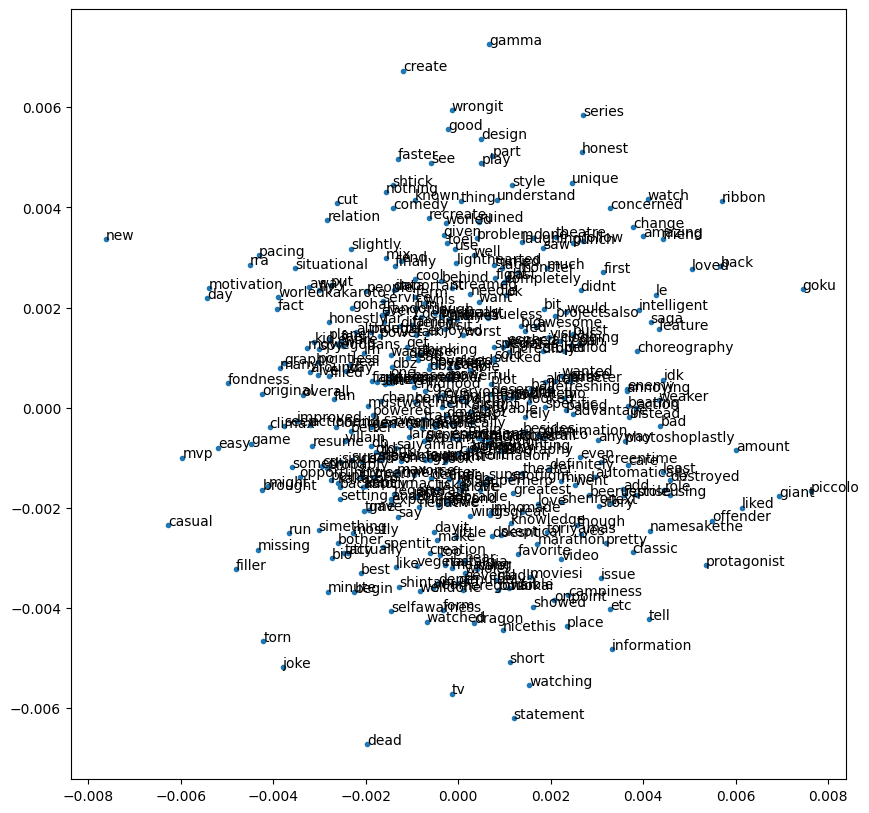

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Get the word vectors and corresponding words from the model
word_vectors = model.wv.vectors
words = model.wv.index_to_key

# Reduce the dimensionality of the word vectors to 2 dimensions using t-SNE
pca = PCA(n_components=2, random_state=42)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot the 2D embeddings
plt.figure(figsize=(10, 10))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='.')
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file


# Link: https://raw.githubusercontent.com/abhi147p/Abhishek_INFO5731_Spring2023/main/Assignment_3_sentiment.csv
